In [6]:
pip install facenet-pytorch

  Using cached facenet_pytorch-2.6.0-py3-none-any.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import tarfile
import requests

# Function to download the LFW dataset
def download_lfw(output_dir="lfw"):
    url = "http://vis-www.cs.umass.edu/lfw/lfw.tgz"
    tar_path = os.path.join(output_dir, "lfw.tgz")
    
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Download the dataset
    print("Downloading LFW dataset...")
    response = requests.get(url, stream=True)
    with open(tar_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Download complete.")
    
    # Extract the tar file
    print("Extracting dataset...")
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=output_dir)
    print("Extraction complete.")
    
    # Remove the tar file
    os.remove(tar_path)
    print(f"LFW dataset is ready in '{output_dir}/lfw'.")

# Call the function to download and extract LFW
download_lfw(output_dir="lfw_data")


Download complete.
Extracting dataset...
Extraction complete.
LFW dataset is ready in 'lfw_data/lfw'.


In [102]:
import os
import random
import pandas as pd
from PIL import Image

# Set seed for reproducibility
random.seed(42)

# Define the dataset path
dataset_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\lfw_data"

# Dictionary to store images per person
person_to_images = {}

# Load images from the dataset
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            person_name = os.path.basename(root)
            image_path = os.path.join(root, file)
            if person_name not in person_to_images:
                person_to_images[person_name] = []
            person_to_images[person_name].append(image_path)

# Filter persons with at least 5 images
eligible_persons = {k: v for k, v in person_to_images.items() if len(v) >= 5}

# Randomly sample 200 images
selected_images = []
selected_labels = []
total_selected = 0

while total_selected < 200:
    for person, images in eligible_persons.items():
        if len(images) >= 5:
            sampled = random.sample(images, min(len(images), 5))
            selected_images.extend(sampled)
            selected_labels.extend([person] * len(sampled))
            total_selected += len(sampled)
            if total_selected >= 200:
                break

# Ensure exactly 200 images
selected_images = selected_images[:200]
selected_labels = selected_labels[:200]

# Save the results
data = pd.DataFrame({"Image_Path": selected_images, "Person": selected_labels})
output_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\selected_lfw_data.csv"
data.to_csv(output_path, index=False)

print(f"Selected data saved to {output_path}")


Selected data saved to C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\selected_lfw_data.csv


In [2]:
pip install deepface



  Using cached deepface-0.0.93-py3-none-any.whl (108 kB)
  Using cached mtcnn-1.0.0-py3-none-any.whl (1.9 MB)
  Using cached gunicorn-23.0.0-py3-none-any.whl (85 kB)
  Using cached Flask_Cors-5.0.0-py2.py3-none-any.whl (14 kB)
  Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
  Using cached fire-0.7.0-py3-none-any.whl
  Using cached retina_face-0.0.17-py3-none-any.whl (25 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


In [4]:
pip install tf-keras

     ---------------------------------------- 1.7/1.7 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 390.0/390.0 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.17.0
    Uninstalling tensorflow-intel-2.17.0:
      Successfully uninstalled tensorflow-intel-2.17.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Berci\\anaconda3\\Lib\\site-packages\\~ensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import os
import cv2
import numpy as np
import pandas as pd

# Load OpenCV DNN for face detection (example model)
face_detector_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(face_detector_path)

# Placeholder for embeddings and names
embeddings = []
names = []

# Function to extract face embeddings (dummy example)
def generate_embedding(face):
    # Resize face to a fixed size for embedding model (example 128x128)
    resized_face = cv2.resize(face, (128, 128))
    # Flatten image as a simple stand-in for embedding (replace with a model)
    embedding = resized_face.flatten() / 255.0  # Normalize pixel values
    return embedding

# Load selected data
selected_data_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\selected_lfw_data.csv"
data = pd.read_csv(selected_data_path)

# Process each image
for index, row in data.iterrows():
    image_path = row["Image_Path"]
    person_name = row["Person"]

    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        
        # Generate embedding for the first detected face
        embedding = generate_embedding(face)
        embeddings.append(embedding)
        names.append(person_name)
        break  # Process only the first face in the image

# Save embeddings to a CSV
embeddings_array = np.array(embeddings)
output_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\lfw_embeddings_opencv.csv"
output_data = pd.DataFrame(embeddings_array)
output_data["Person"] = names
output_data.to_csv(output_path, index=False)

print(f"Embeddings saved to: {output_path}")


Embeddings saved to: C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\lfw_embeddings_opencv.csv


In [4]:
import pandas as pd
import random

# Betöltjük az előző lépésben mentett adatokat
selected_data_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\selected_lfw_data.csv"
data = pd.read_csv(selected_data_path)

# Csoportosítás személyek szerint
grouped = data.groupby("Person")
train_data = []
test_data = []

# Minden személyhez tartozó képek szeparálása
remaining_images = []  # Ide kerülnek azok a képek, amelyeket később osztunk el

for person, group in grouped:
    images = group["Image_Path"].tolist()
    random.shuffle(images)
    
    # Legalább 1-1 kép tanító és teszt halmazba
    if len(images) >= 2:
        train_data.append(images.pop())
        test_data.append(images.pop())
    elif len(images) == 1:  # Ha csak 1 kép van, az mindkettőbe kerül
        remaining_images.append(images.pop())

    # Maradék képek gyűjtése
    remaining_images.extend(images)

# További képek elosztása
random.shuffle(remaining_images)

while len(train_data) < 150 and remaining_images:
    train_data.append(remaining_images.pop())

while len(test_data) < 50 and remaining_images:
    test_data.append(remaining_images.pop())

# Ellenőrzés: megfelel-e az arányoknak
assert len(train_data) == 150, f"Train data size is incorrect: {len(train_data)}"
assert len(test_data) == 50, f"Test data size is incorrect: {len(test_data)}"

# Eredmények mentése
train_output_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv"
test_output_path = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv"

pd.DataFrame({"Image_Path": train_data}).to_csv(train_output_path, index=False)
pd.DataFrame({"Image_Path": test_data}).to_csv(test_output_path, index=False)

print(f"Train data saved to: {train_output_path}")
print(f"Test data saved to: {test_output_path}")


Train data saved to: C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv
Test data saved to: C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv


In [6]:
import pandas as pd
import os

# Betöltjük a train és test fájlokat
train_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv"
test_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Személyek nevének kinyerése az Image_Path-ból
train_data['Person'] = train_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
test_data['Person'] = test_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Egyedi nevek száma a train és test adathalmazban
train_unique_names = train_data['Person'].nunique()
test_unique_names = test_data['Person'].nunique()

# Az összes személy, és az átfedés ellenőrzése
all_names = set(train_data['Person']).union(set(test_data['Person']))
names_in_both = set(train_data['Person']).intersection(set(test_data['Person']))

# Eredmények kiíratása
print(f"Unique names in train data: {train_unique_names}")
print(f"Unique names in test data: {test_unique_names}")
print(f"Names in both train and test: {len(names_in_both)}")
print(f"Total unique names in both sets: {len(all_names)}")
print(f"All names accounted for in both sets: {len(all_names) == len(train_data['Person'].unique()) + len(test_data['Person'].unique())}")


Unique names in train data: 40
Unique names in test data: 40
Names in both train and test: 40
Total unique names in both sets: 40
All names accounted for in both sets: False


In [7]:
import pandas as pd
import os

# Betöltjük a train és test fájlokat
train_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv"
test_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Személyek nevének kinyerése az Image_Path-ból
train_data['Person'] = train_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
test_data['Person'] = test_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Egyedi nevek száma a train és test adathalmazban
train_unique_names = train_data['Person'].nunique()
test_unique_names = test_data['Person'].nunique()

# Az összes személy, és az átfedés ellenőrzése
train_names_set = set(train_data['Person'])
test_names_set = set(test_data['Person'])

# Személyek, akik csak az egyik halmazban szerepelnek
only_in_train = train_names_set - test_names_set
only_in_test = test_names_set - train_names_set

# Eredmények kiíratása
print(f"Unique names in train data: {train_unique_names}")
print(f"Unique names in test data: {test_unique_names}")
print(f"Names in both train and test: {len(train_names_set.intersection(test_names_set))}")
print(f"Total unique names in both sets: {len(train_names_set.union(test_names_set))}")
print(f"Names only in train data: {len(only_in_train)}")
print(f"Names only in test data: {len(only_in_test)}")
print(f"All names accounted for in both sets: {len(only_in_train) == 0 and len(only_in_test) == 0}")


Unique names in train data: 40
Unique names in test data: 40
Names in both train and test: 40
Total unique names in both sets: 40
Names only in train data: 0
Names only in test data: 0
All names accounted for in both sets: True


In [13]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Betöltjük a train és test adatokat
train_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv"
test_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Személyek nevének kinyerése az Image_Path-ból
train_data['Person'] = train_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
test_data['Person'] = test_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Betöltjük a CLIP modellt a beágyazóvektorokhoz
model_name = "openai/clip-vit-base-patch16"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name)

def get_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features[0].numpy()

# Beágyazóvektorok kiszámítása a tanító adatokhoz
train_embeddings = []
train_labels = []

for _, row in train_data.iterrows():
    embedding = get_embedding(row['Image_Path'])
    train_embeddings.append(embedding)
    train_labels.append(row['Person'])

train_embeddings = np.array(train_embeddings)

# Beágyazóvektorok kiszámítása a teszt adatokhoz
test_embeddings = []
test_labels = []

for _, row in test_data.iterrows():
    embedding = get_embedding(row['Image_Path'])
    test_embeddings.append(embedding)
    test_labels.append(row['Person'])

test_embeddings = np.array(test_embeddings)

# Koszinusz hasonlóság számítása
similarities = cosine_similarity(test_embeddings, train_embeddings)

# Debugolás: Ellenőrizzük a hasonlóságokat
print("Similarities matrix (showing a subset):")
print(similarities[:5, :5])  # Csak az első 5 teszt- és tanítókép közötti hasonlóságokat mutatjuk

# Leginkább hasonló vektorok keresése
predictions = []
for i in range(len(test_data)):
    most_similar_idx = np.argmax(similarities[i])
    predictions.append(train_labels[most_similar_idx])
    
    # Debugolás: Képek és hasonlóságok ellenőrzése
    if i < 50:  # Az első 5 tesztkép ellenőrzése
        print(f"Test Image: {test_labels[i]} | Most Similar Train Image: {train_labels[most_similar_idx]} | Similarity: {similarities[i][most_similar_idx]:.4f}")

# Pontosság számítása
correct = sum([1 if predictions[i] == test_labels[i] else 0 for i in range(len(test_labels))])
accuracy = correct / len(test_labels)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Similarities matrix (showing a subset):
[[0.8563297  0.42507893 0.76377714 0.48498768 0.56715703]
 [0.4516188  0.8183799  0.36491698 0.52228314 0.47820446]
 [0.67397594 0.4388454  0.8317404  0.41986328 0.57204103]
 [0.4376527  0.48431867 0.35904264 0.7855331  0.41473687]
 [0.45247367 0.5351185  0.32899493 0.50043815 0.66109395]]
Test Image: Abdullah_Gul | Most Similar Train Image: Abdullah_Gul | Similarity: 0.8995
Test Image: Adrien_Brody | Most Similar Train Image: Adrien_Brody | Similarity: 0.8636
Test Image: Ahmed_Chalabi | Most Similar Train Image: Ahmed_Chalabi | Similarity: 0.9026
Test Image: Ai_Sugiyama | Most Similar Train Image: Ai_Sugiyama | Similarity: 0.8470
Test Image: Al_Gore | Most Similar Train Image: Al_Gore | Similarity: 0.6986
Test Image: Al_Sharpton | Most Similar Train Image: Al_Sharpton | Similarity: 0.8930
Test Image: Alan_Greenspan | Most Similar Train Image: Alan_Greenspan | Similarity: 0.8373
Test Image: Alastair_Campbell | Most Similar Train Image: Alastair_C

In [19]:
#Furcsa a 100%-os pontosság, ezért teszteltem, miket hoz ki best match-ként a kód:#

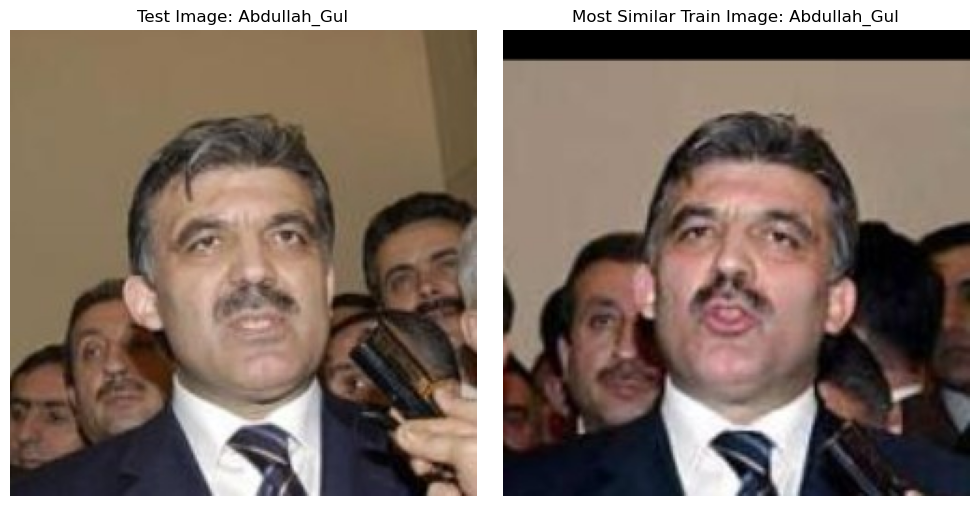

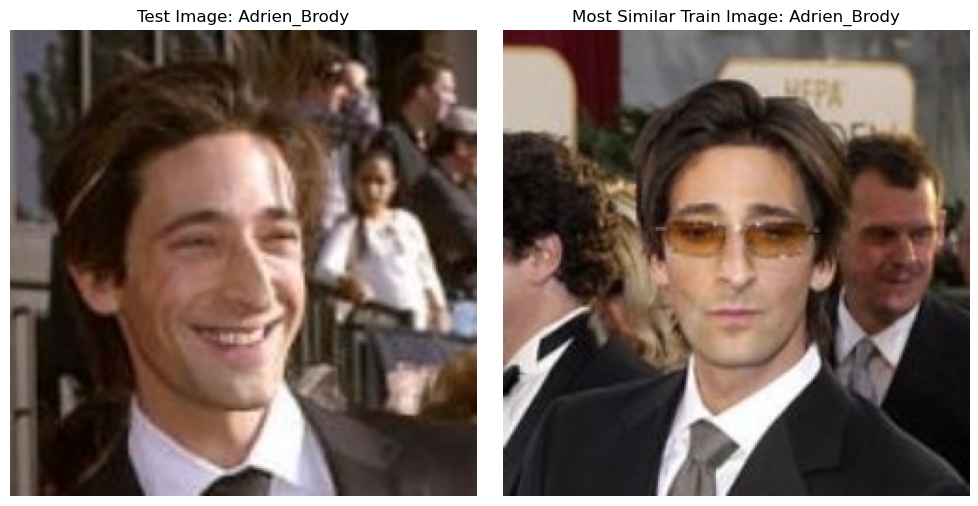

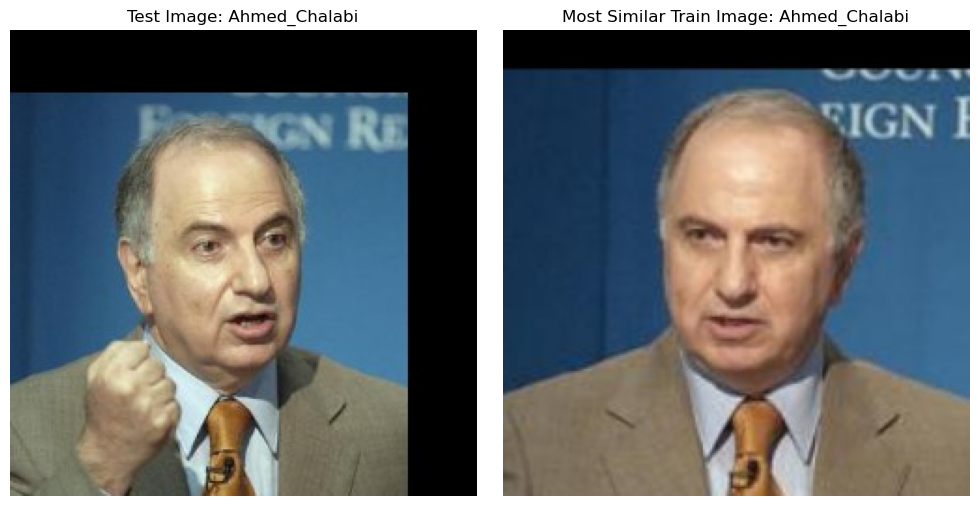

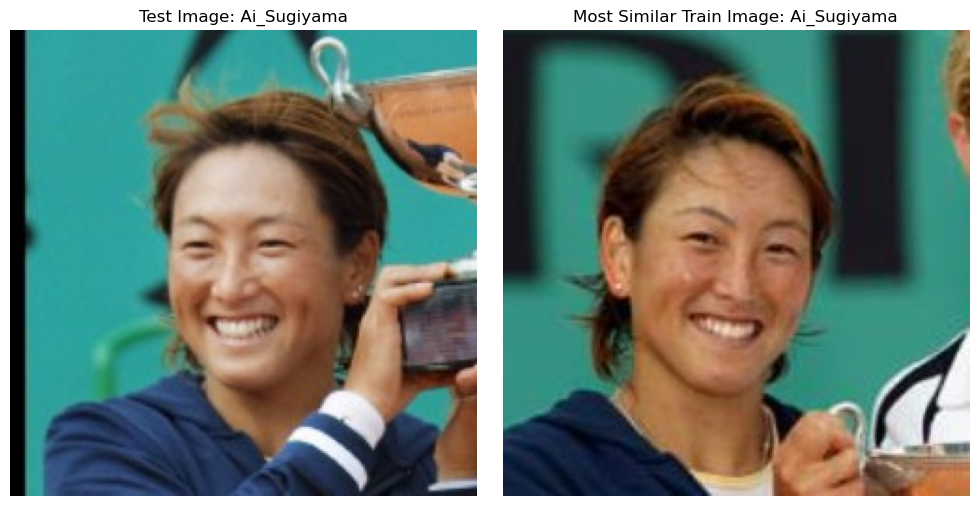

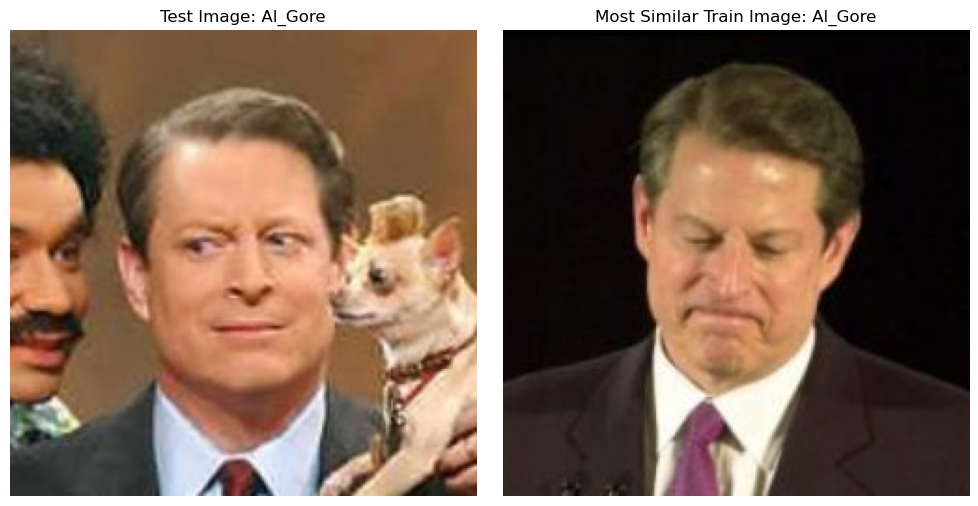

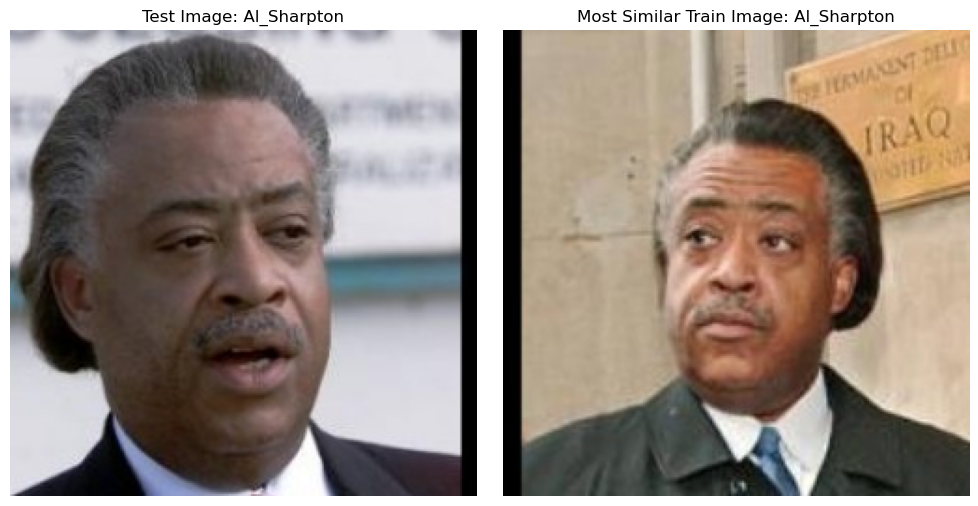

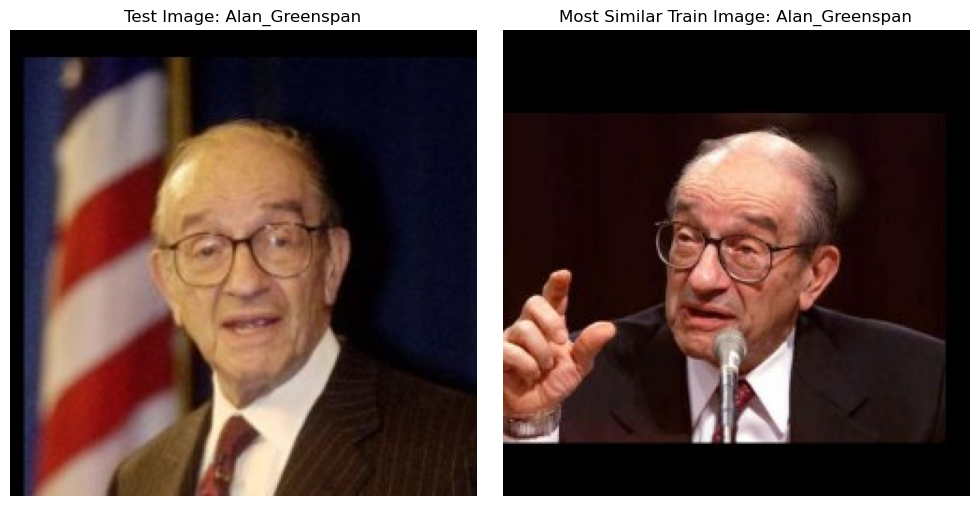

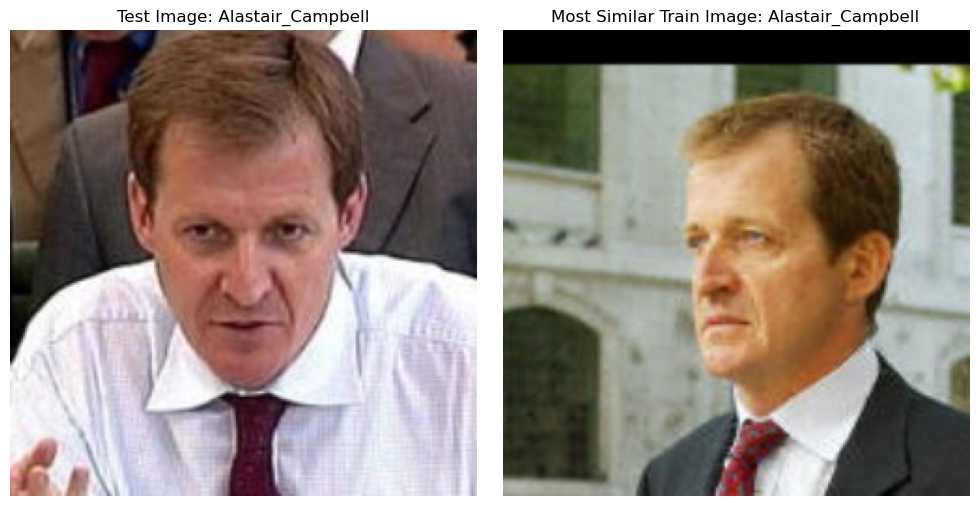

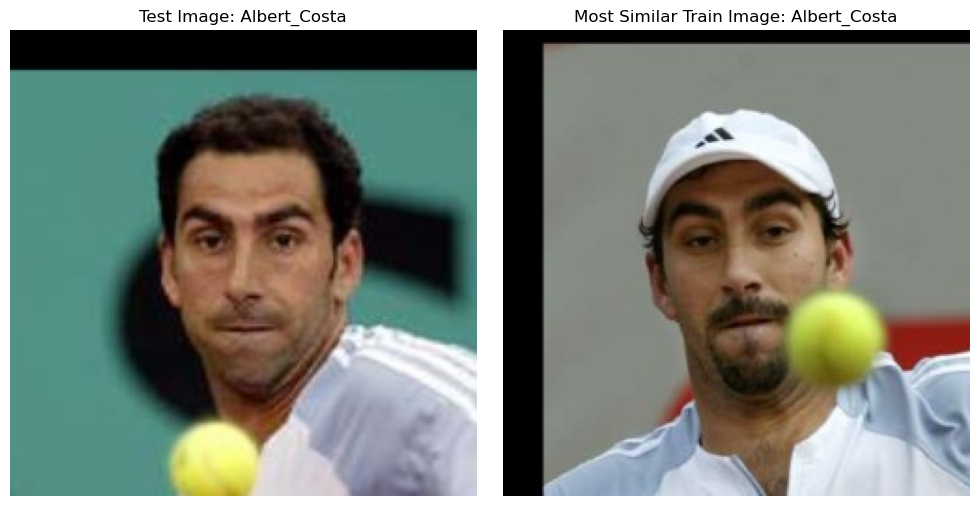

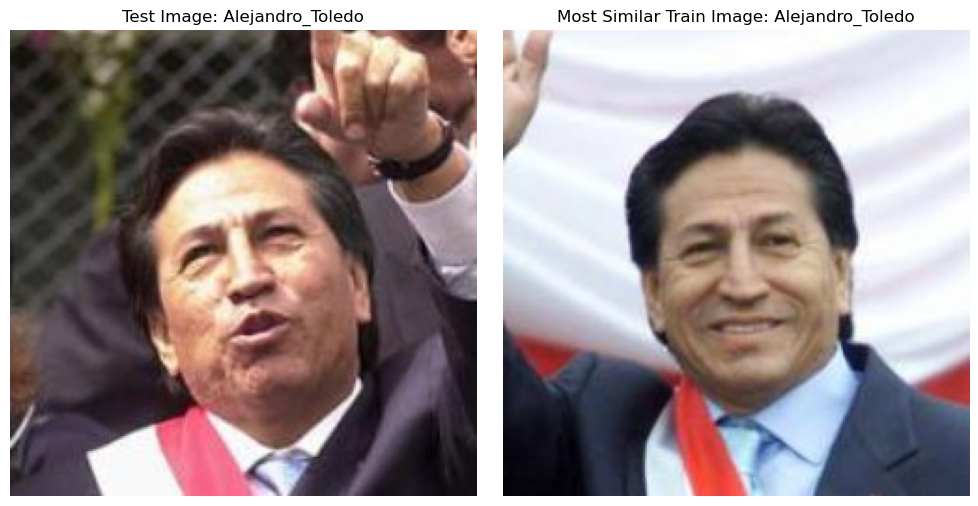

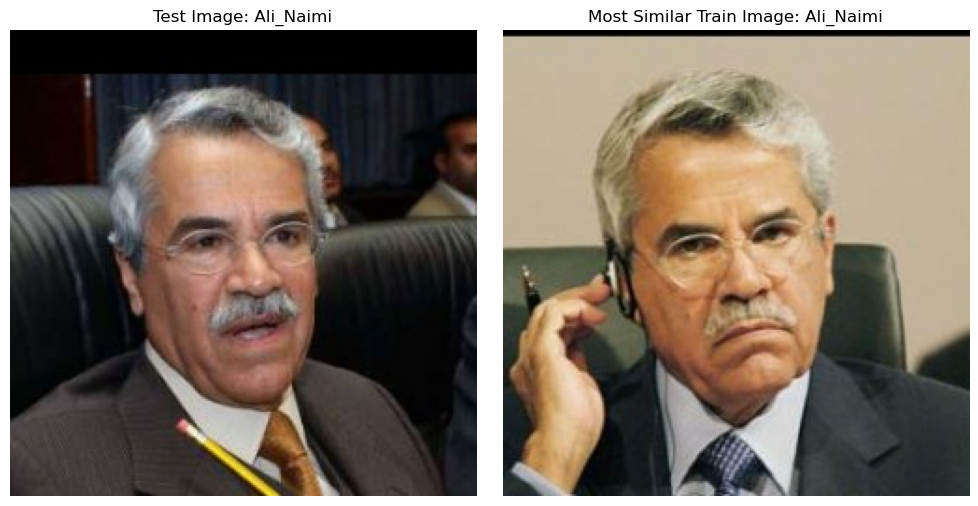

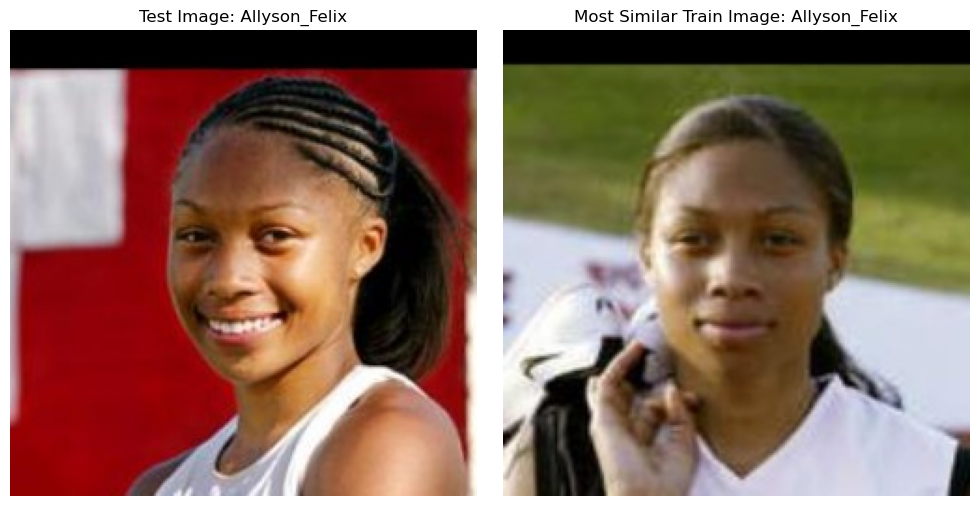

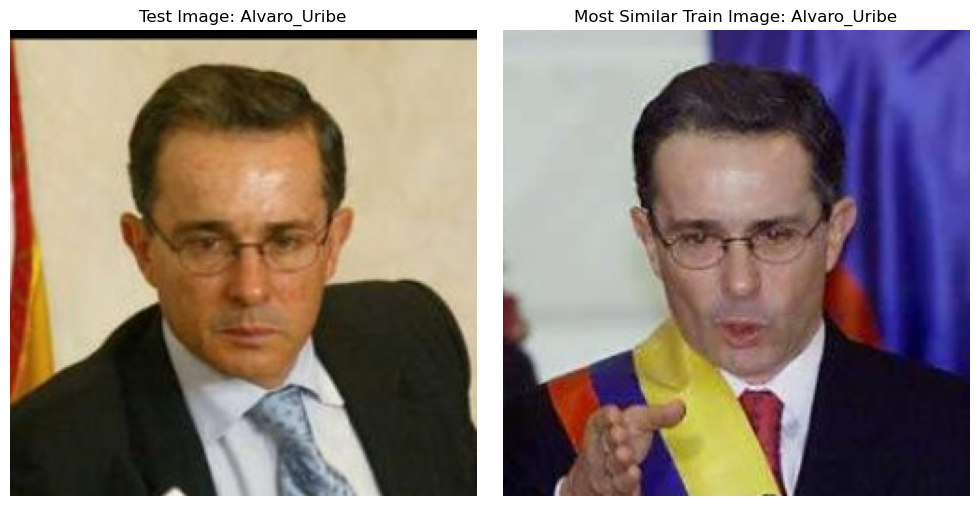

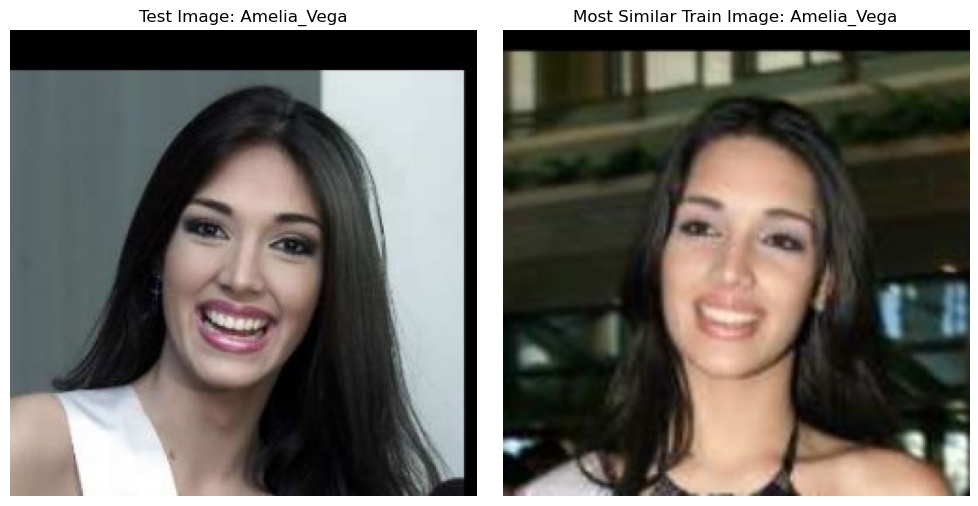

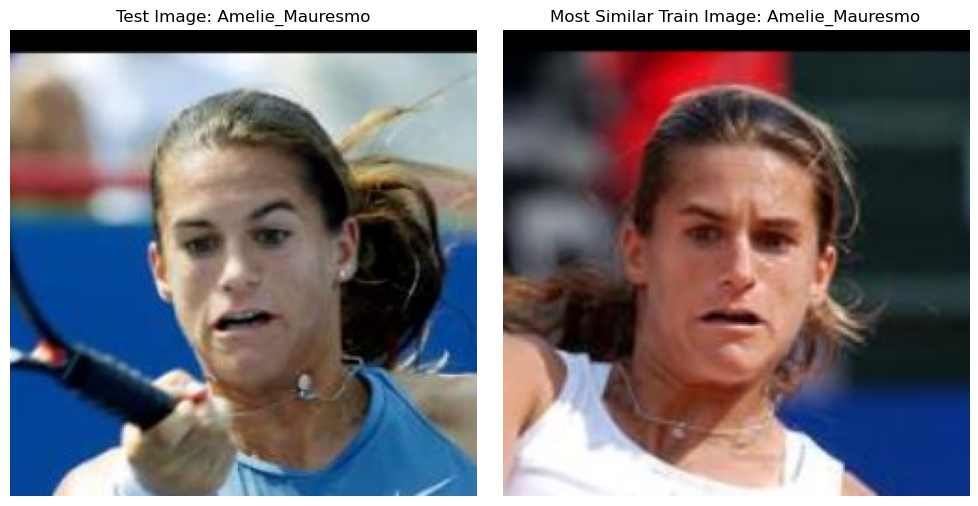

Accuracy on the test set: 100.00%


In [17]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your data files (train and test CSVs)
train_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\train_data.csv"
test_file = r"C:\Users\Berci\Documents\Egyetem\7\Adatbanyaszat\test_data.csv"

# Load train and test datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Extracting the person's name from the Image_Path
train_data['Person'] = train_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))
test_data['Person'] = test_data['Image_Path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Load CLIP model and processor
model_name = "openai/clip-vit-base-patch16"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name)

# Function to compute embedding for a given image
def get_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features[0].numpy()

# Compute embeddings for the training data
train_embeddings = []
train_labels = []
for _, row in train_data.iterrows():
    embedding = get_embedding(row['Image_Path'])
    train_embeddings.append(embedding)
    train_labels.append(row['Person'])
train_embeddings = np.array(train_embeddings)

# Compute embeddings for the test data
test_embeddings = []
test_labels = []
for _, row in test_data.iterrows():
    embedding = get_embedding(row['Image_Path'])
    test_embeddings.append(embedding)
    test_labels.append(row['Person'])
test_embeddings = np.array(test_embeddings)

# Compute cosine similarities
similarities = cosine_similarity(test_embeddings, train_embeddings)

# Find most similar images for each test image
predictions = []
for i in range(len(test_data)):
    most_similar_idx = np.argmax(similarities[i])  # Get the index of the most similar image
    predictions.append(train_labels[most_similar_idx])

    # If the image is one of the first 5, display the images
    if i < 15:  # Display first 5 test images
        test_img_path = test_data.iloc[i]['Image_Path']
        train_img_path = train_data.iloc[most_similar_idx]['Image_Path']

        # Load test and most similar train images
        test_image = mpimg.imread(test_img_path)
        train_image = mpimg.imread(train_img_path)

        # Plot the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(test_image)
        axes[0].axis('off')
        axes[0].set_title(f"Test Image: {test_labels[i]}")

        axes[1].imshow(train_image)
        axes[1].axis('off')
        axes[1].set_title(f"Most Similar Train Image: {train_labels[most_similar_idx]}")

        plt.tight_layout()
        plt.show()

# Calculate accuracy on the test set
correct = sum([1 if predictions[i] == test_labels[i] else 0 for i in range(len(test_labels))])
accuracy = correct / len(test_labels)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


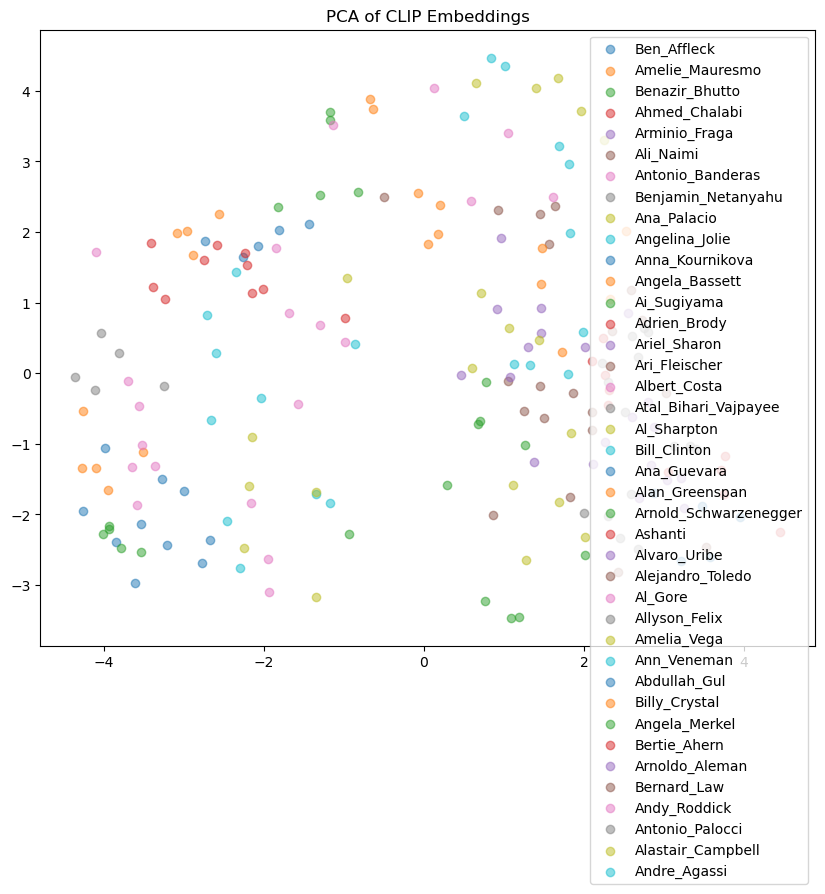

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine train and test embeddings
all_embeddings = np.vstack([train_embeddings, test_embeddings])
all_labels = train_labels + test_labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, label in enumerate(set(all_labels)):
    indices = [j for j, l in enumerate(all_labels) if l == label]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label, alpha=0.5)
plt.legend(loc="best")
plt.title("PCA of CLIP Embeddings")
plt.show()
